In [12]:
import pandas as pd
import numpy as np
import joblib

# 1️⃣ Carregar modelo salvo
loaded_model = joblib.load('modelo_polinomial_smote.pkl')
print("✅ Modelo carregado com sucesso!")
df_test = pd.read_csv('cs-test.csv')
df_test.fillna({'MonthlyIncome': df_test['MonthlyIncome'].median(), 'NumberOfDependents': df_test['NumberOfDependents'].median()}, inplace=True)
# 2️⃣ Carregar o dataset de teste
df_test["IncomePerDependent"] = df_test["MonthlyIncome"] / (df_test["NumberOfDependents"] + 1)
df_test["DebtPerLoan"] = df_test["DebtRatio"] / (df_test["NumberOfOpenCreditLinesAndLoans"] + 1)
df_test["Pagamentos_atrasados_Total"] = df_test['NumberOfTime30-59DaysPastDueNotWorse'] + df_test['NumberOfTime60-89DaysPastDueNotWorse'] + df_test['NumberOfTimes90DaysLate']
# 3️⃣ Garantir que as mesmas features existam (ajuste se necessário)
cols_to_use = [
    'RevolvingUtilizationOfUnsecuredLines', 'age',
    'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines',
    'NumberOfDependents', 'IncomePerDependent',
    'Pagamentos_atrasados_Total', 'MonthlyIncome_log',
    'DebtRatio_clipped', 'DebtPerLoan_clipped'
]

# ⚠️ Se o dataset de teste ainda não tiver as versões "_log" ou "_clipped",
# você precisa criar essas 3 colunas (elas foram geradas fora do pipeline):

df_test['MonthlyIncome_log'] = np.log1p(df_test['MonthlyIncome'].clip(lower=0))
df_test['DebtRatio_clipped'] = df_test['DebtRatio'].clip(upper=10)
df_test['DebtPerLoan_clipped'] = df_test['DebtPerLoan'].clip(upper=100)

# 4️⃣ Selecionar as colunas certas
X_new = df_test[cols_to_use]

# 5️⃣ Gerar probabilidades de inadimplência
y_pred_proba = loaded_model.predict_proba(X_new)[:, 1]

# 6️⃣ Criar arquivo


✅ Modelo carregado com sucesso!


In [13]:
y_pred_proba

array([0.50879547, 0.35886678, 0.17650501, ..., 1.        , 1.        ,
       0.38881189])

In [14]:
submission = pd.DataFrame({
    'Id': np.arange(1, len(y_pred_proba) + 1),
    'Probability': y_pred_proba
})
submission.to_csv('my_submission.csv', index=False)
print("✅ Arquivo 'my_submission.csv' criado com sucesso!")


✅ Arquivo 'my_submission.csv' criado com sucesso!


In [15]:
df2 = pd.read_csv('my_submission.csv')
df2.head()

,Id,Probability
0,1,0.508795
1,2,0.358867
2,3,0.176505
3,4,0.670828
4,5,0.734936


In [17]:
df2.sort_values('Probability', ascending=False).head(10)


,Id,Probability
50751,50752,1.0
67673,67674,1.0
22199,22200,1.0
67648,67649,1.0
22197,22198,1.0
22191,22192,1.0
67655,67656,1.0
67660,67661,1.0
67665,67666,1.0
22184,22185,1.0


In [19]:
df2.sort_values('Probability', ascending=True).head(10)


,Id,Probability
12927,12928,0.0
17867,17868,0.0
10310,10311,0.0
35282,35283,0.0
71760,71761,0.0
65962,65963,0.0
69513,69514,0.0
14916,14917,0.0
78499,78500,0.0
10721,10722,0.0


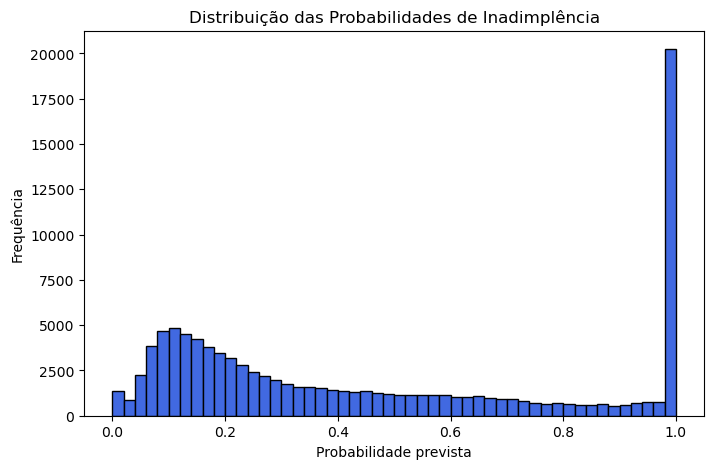

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df2['Probability'], bins=50, color='royalblue', edgecolor='black')
plt.title('Distribuição das Probabilidades de Inadimplência')
plt.xlabel('Probabilidade prevista')
plt.ylabel('Frequência')
plt.show()
